[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Khipucamayoc/Quipucamayoc/blob/master/colabs/TTS_ESPnet_es_AR.ipynb)

# ESPnet real time E2E-TTS demonstration

This notebook provides a demonstration of the realtime E2E-TTS using ESPnet-TTS and ParallelWaveGAN (+ MelGAN).

- ESPnet: https://github.com/espnet/espnet
- ParallelWaveGAN: https://github.com/kan-bayashi/ParallelWaveGAN

Author: Tomoki Hayashi ([@kan-bayashi](https://github.com/kan-bayashi))

## Install

In [ ]:
# install minimal components
!pip install -q parallel_wavegan PyYaml unidecode ConfigArgparse g2p_en nltk
!git clone -q https://github.com/espnet/espnet.git
!cd espnet && git fetch && git checkout -b v.0.6.1 1e8b6ce88d57b53d1b60cbb3f306652468b0ab63

     |████████████████████████████████| 51kB 1.7MB/s 
     |████████████████████████████████| 245kB 6.3MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 3.1MB 11.7MB/s 
     |████████████████████████████████| 1.6MB 27.2MB/s 
     |████████████████████████████████| 204kB 55.5MB/s 
     |████████████████████████████████| 184kB 40.8MB/s 
Switched to a new branch 'v.0.6.1'




---
## Spanish demo


#### Tacotron2

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# download pretrained model
import os
dirName="/content/downloads/es/tacotron2"
if not os.path.exists(dirName):
  os.makedirs(dirName)
#OLD
  # downloaded = drive.CreateFile({'id':"1GqcH4VswcgLPWIpUtBIgTYmAUdI3vCzt"})
  # model_path = "downloads/es/tacotron2/exp/es_ES_victor_train_trim_pytorch_es_AR_scratch/results/snapshot.ep.122"

  # downloaded = drive.CreateFile({'id':"1Fxf1MtOd5jZ6Dmzg8vJaZtSHlstijXYK"})
  # model_path = "downloads/es/tacotron2/exp/es_ES_victor_train_trim_pytorch_es_AR_scratch/results/snapshot.ep.337"

  # downloaded = drive.CreateFile({'id':"1MgoXQtv4TIca_9hxNUKY2wVY4rrRmoHT"})
  # model_path = "downloads/es/tacotron2/exp/es_ES_victor_train_trim_pytorch_es_AR_scratch/results/model.last1.avg.best"

#NEW
  # downloaded = drive.CreateFile({'id':"1LnatLDBeTdaB-aBXcKD6QLlnOqofFxDb"})
  # model_path = "downloads/es/tacotron2/exp/es_ES_victor_train_trim_pytorch_es_AR_scratch/results/snapshot.ep.800"

  downloaded = drive.CreateFile({'id':"1KYQiLtmKiLBIYOJ_c7Z8s9xdLCKMOc4r"})
  model_path = "downloads/es/tacotron2/exp/es_ES_victor_train_trim_pytorch_es_AR_scratch/results/model.last1.avg.best"

  checkpoint_path = "/content/downloads/es/tacotron2/tacotron2.tar.gz"
  downloaded.GetContentFile(checkpoint_path)
  !tar -xvf $checkpoint_path -C $dirName

# set path
trans_type = "char"
dict_path = "downloads/es/tacotron2/data/lang_1char/es_ES_victor_train_trim_units.txt"

print("sucessfully finished download.")

conf/decode.yaml
conf/tuning/train_pytorch_tacotron2.v3.yaml
data/lang_1char/es_ES_victor_train_trim_units.txt
exp/es_ES_victor_train_trim_pytorch_es_AR_scratch/results/model.json
exp/es_ES_victor_train_trim_pytorch_es_AR_scratch/results/model.last1.avg.best
sucessfully finished download.


### Download pretrained vocoder model

You can select one from two models. Please only run the seletected model cells.

#### (a) Parallel WaveGAN

In [ ]:
# download pretrained model
import os
if not os.path.exists("downloads/en/parallel_wavegan"):
    !./espnet/utils/download_from_google_drive.sh \
        https://drive.google.com/open?id=1Grn7X9wD35UcDJ5F7chwdTqTa4U7DeVB downloads/en/parallel_wavegan tar.gz

# set path
vocoder_path = "downloads/en/parallel_wavegan/ljspeech.parallel_wavegan.v2/checkpoint-400000steps.pkl"
vocoder_conf = "downloads/en/parallel_wavegan/ljspeech.parallel_wavegan.v2/config.yml"

print("Sucessfully finished download.")

--2020-06-04 15:09:49--  https://drive.google.com/uc?export=download&id=1Grn7X9wD35UcDJ5F7chwdTqTa4U7DeVB
Resolving drive.google.com (drive.google.com)... 173.194.216.102, 173.194.216.101, 173.194.216.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.216.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8gorkbvlb0k2jslkdao81e7grnd7cg4s/1591283325000/04214513489132088126/*/1Grn7X9wD35UcDJ5F7chwdTqTa4U7DeVB?e=download [following]
--2020-06-04 15:09:52--  https://doc-0o-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8gorkbvlb0k2jslkdao81e7grnd7cg4s/1591283325000/04214513489132088126/*/1Grn7X9wD35UcDJ5F7chwdTqTa4U7DeVB?e=download
Resolving doc-0o-30-docs.googleusercontent.com (doc-0o-30-docs.googleusercontent.com)... 74.125.31.132, 2607:f8b0:400c:c02::84
Connecting to doc-0o-30-docs.googleusercontent.com (doc

#### (b) MelGAN

This is an **EXPERIMENTAL** model.



In [ ]:
# download pretrained model
# import os
# if not os.path.exists("downloads/en/melgan"):
#     !./espnet/utils/download_from_google_drive.sh \
#         https://drive.google.com/open?id=1_a8faVA5OGCzIcJNw4blQYjfG4oA9VEt downloads/en/melgan tar.gz

# set path
# vocoder_path = "downloads/en/melgan/train_nodev_ljspeech_melgan.v3.long/checkpoint-4000000steps.pkl"
# vocoder_conf = "downloads/en/melgan/train_nodev_ljspeech_melgan.v3.long/config.yml"

# print("Sucessfully finished download.")

### Setup

In [ ]:
# add path
import sys
# TODO, change this to a different eg?
sys.path.append("espnet/egs/ljspeech/tts1/local")
sys.path.append("espnet")

# define device
import torch
device = torch.device("cuda")

# define E2E-TTS model
from argparse import Namespace
from espnet.asr.asr_utils import get_model_conf
from espnet.asr.asr_utils import torch_load
from espnet.utils.dynamic_import import dynamic_import
idim, odim, train_args = get_model_conf(model_path)
model_class = dynamic_import(train_args.model_module)
model = model_class(idim, odim, train_args)
torch_load(model_path, model)
model = model.eval().to(device)
inference_args = Namespace(**{
    "threshold": 0.5,"minlenratio": 0.0, "maxlenratio": 10.0,
    "use_attention_constraint": True,
    "backward_window": 1, "forward_window":3,
    })

# define neural vocoder
import yaml
import parallel_wavegan.models
with open(vocoder_conf) as f:
    config = yaml.load(f, Loader=yaml.Loader)
vocoder_class = config.get("generator_type", "ParallelWaveGANGenerator")
vocoder = getattr(parallel_wavegan.models, vocoder_class)(**config["generator_params"])
vocoder.load_state_dict(torch.load(vocoder_path, map_location="cpu")["model"]["generator"])
vocoder.remove_weight_norm()
vocoder = vocoder.eval().to(device)

# define text frontend
from text.cleaners import basic_cleaners, english_cleaners
from g2p_en import G2p
with open(dict_path) as f:
    lines = f.readlines()
lines = [line.replace("\n", "").split(" ") for line in lines]
char_to_id = {c: int(i) for c, i in lines}
g2p = G2p()
def frontend(text):
    """Clean text and then convert to id sequence."""
    text = basic_cleaners(text)
    text = text.upper()
    if trans_type == "phn":
        text = filter(lambda s: s != " ", g2p(text))
        text = " ".join(text)
        print(f"Cleaned text: {text}")
        charseq = text.split(" ")
    else:
        print(f"Cleaned text: {text}")
        charseq = list(text)
    idseq = []
    for c in charseq:
        if c.isspace():
            idseq += [char_to_id["<space>"]]
        elif c not in char_to_id.keys():
            idseq += [char_to_id["<unk>"]]
        else:
            idseq += [char_to_id[c]]
    idseq += [idim - 1]  # <eos>
    return torch.LongTensor(idseq).view(-1).to(device)

import nltk
nltk.download('punkt')
print("Now ready to synthesize!")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Now ready to synthesize!


### Synthesis

In [ ]:
%matplotlib inline

Input your favorite sentence in Spanish!
El poema de estar en mí. Esta mañana dentro los ojos con un tiempo sin nombre, y me sentía, un poema y mi corazón.
Cleaned text: EL POEMA DE ESTAR EN MÍ. ESTA MAÑANA DENTRO LOS OJOS CON UN TIEMPO SIN NOMBRE, Y ME SENTÍA, UN POEMA Y MI CORAZÓN.
RTF = 0.142263


Cleaned text: EL POEMA DE ESTAR EN MÍ. ESTA MAÑANA DENTRO LOS OJOS CON UN TIEMPO SIN NOMBRE, Y ME SENTÍA, UN POEMA Y MI CORAZÓN.
RTF = 0.133913


Cleaned text: EL POEMA DE ESTAR EN MÍ. ESTA MAÑANA DENTRO LOS OJOS CON UN TIEMPO SIN NOMBRE, Y ME SENTÍA, UN POEMA Y MI CORAZÓN.
RTF = 0.119254


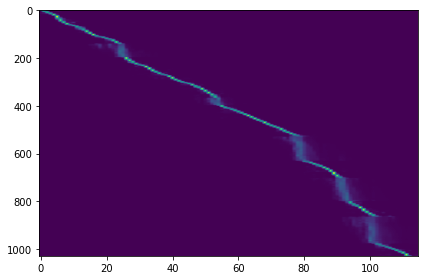

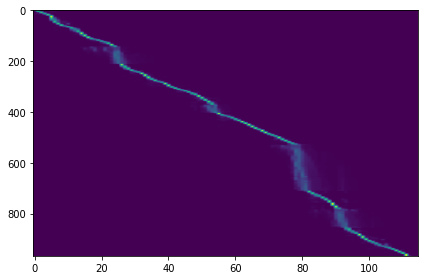

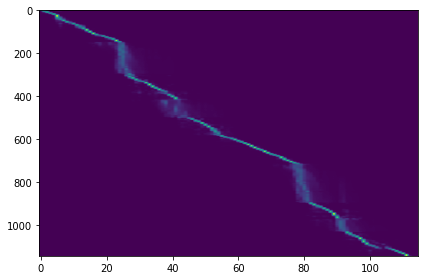

In [ ]:
import time
import matplotlib.pyplot as plt
print("Input your favorite sentence in Spanish!")
#text = "El poema de estar en mí. Esta mañana dentro los ojos con un tiempo sin nombre, y me sentía, un poema y mi corazón."
#text = "Ciencia Oye al sol del cielo. Ya todo es ciencia. Haz que se me abandona. No más a qué es tu noche que no es más, tu ciencia."
#text = 'He contado al lector todo cuanto sabía: era un deber para mí.'
#text = 'prueba de que el alma solo concibe santos pensamientos y de que los labios no dicen mas que palabras piadosas.'
#text = 'Hola Parag Kenric y Paola espero que estén bien durante esta cuarentena.'
input_text = input()
pad_fn = torch.nn.ReplicationPad1d(
    config["generator_params"].get("aux_context_window", 0))
use_noise_input = vocoder_class == "ParallelWaveGANGenerator"

generate_count = 3
for x in range(generate_count):
  with torch.no_grad():
      start = time.time()
      x = frontend(input_text)
      c, _, att_ws = model.inference(x, inference_args)

      c = pad_fn(c.unsqueeze(0).transpose(2, 1)).to(device)
      xx = (c,)
      if use_noise_input:
          z_size = (1, 1, (c.size(2) - sum(pad_fn.padding)) * config["hop_size"])
          z = torch.randn(z_size).to(device)
          xx = (z,) + xx
      y = vocoder(*xx).view(-1)

  rtf = (time.time() - start) / (len(y) / config["sampling_rate"])
  print(f"RTF = {rtf:5f}")

  pltdata = att_ws.cpu().numpy()
  plt.figure(figsize=(6,4))
  plt.imshow(pltdata, aspect="auto")
  plt.tight_layout()

  from IPython.display import display, Audio
  display(Audio(y.view(-1).cpu().numpy(), rate=config["sampling_rate"]))
